In [1]:
# importing required libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =  pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [3]:
len(df)

10000

In [4]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                10
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [5]:
df = df.fillna(df["Age"].mean())
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.000000,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,38.924424,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.000000,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.82,1,1,1,79084.10,0


In [7]:
(df["Exited"] == 1).sum()

2037

In [8]:
(df["Exited"] == 0).sum()

7963

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# Univariant Analysis
target_name = "Exited"
particular_column = "Geography"

Text(0.5, 1.0, 'The count plot of Geography with respect to Exited')

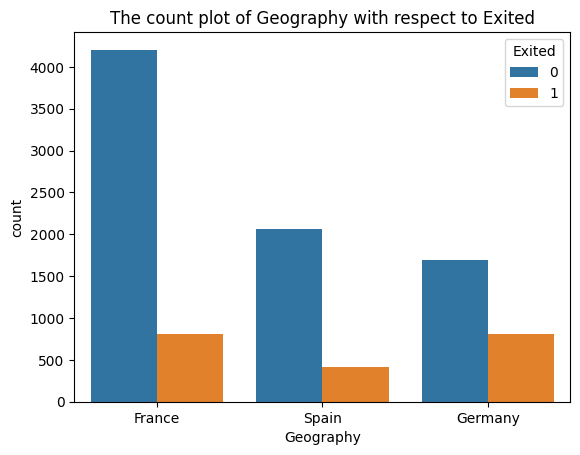

In [11]:
sns.countplot(data = df ,x = particular_column ,hue = target_name)
plt.title(f'The count plot of {particular_column} with respect to {target_name}')

In [12]:
# Univariant Analysis
target_name = "Exited"
particular_column = "Gender"

Text(0.5, 1.0, 'The count plot of Gender with respect to Exited')

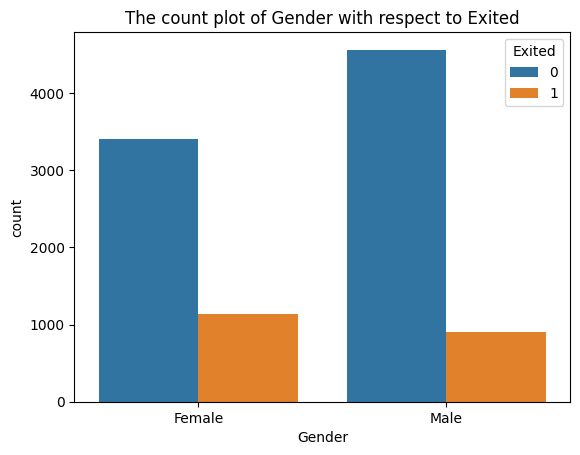

In [13]:
sns.countplot(data = df ,x = particular_column ,hue = target_name)
plt.title(f'The count plot of {particular_column} with respect to {target_name}')

In [14]:
# Bivariant Analysis
df_local_1 = df[['Geography','Gender','Exited']]

In [15]:
df_local_1.head(9)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
5,Spain,Male,1
6,France,Male,0
7,Germany,Female,1
8,France,Male,0


<AxesSubplot:xlabel='Gender', ylabel='Count'>

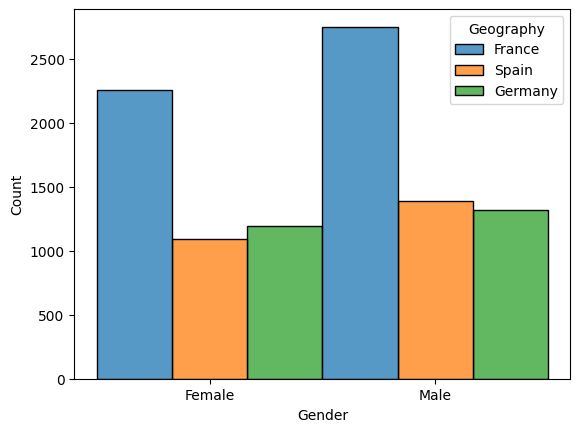

In [16]:
sns.histplot(data = df_local_1 ,x = 'Gender' ,hue = 'Geography' ,multiple = 'dodge')

In [17]:
df_local_2 = df_local_1.loc[df_local_1["Exited"] == 1]

In [18]:
df_local_2.head()

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1


<AxesSubplot:xlabel='Gender', ylabel='Count'>

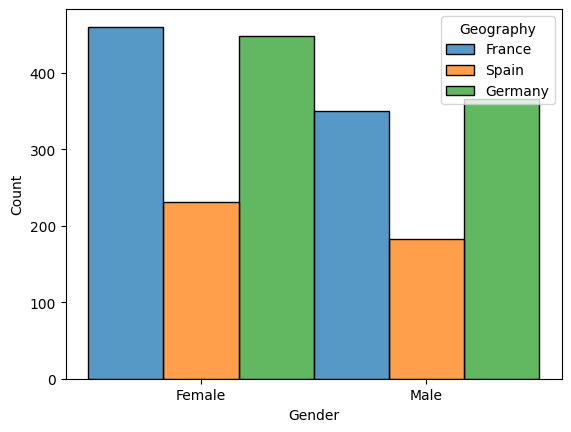

In [19]:
sns.histplot(data = df_local_2 ,x = 'Gender' ,hue = 'Geography' ,multiple = 'dodge')

In [20]:
# Numerical Analysis
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000822,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009982,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.004426,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000822,0.009982,-0.004426,1.000000,-0.010267,0.028253,-0.030102,-0.012124,0.085355,-0.006875,0.285535
Tenure,-0.006495,-0.014883,0.000842,-0.010267,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028253,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030102,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.012124,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085355,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.006875,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

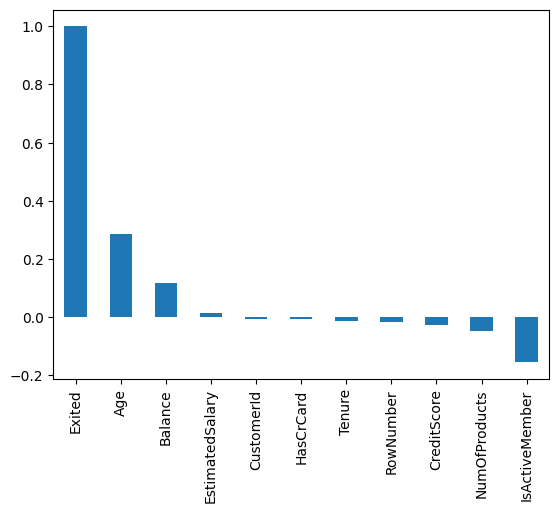

In [21]:
df.corr()["Exited"].sort_values(ascending = False).plot(kind = 'bar')

In [22]:
df["Age"].value_counts()

37.0    478
38.0    477
35.0    472
36.0    455
34.0    447
       ... 
92.0      2
82.0      1
88.0      1
85.0      1
83.0      1
Name: Age, Length: 71, dtype: int64

<AxesSubplot:>

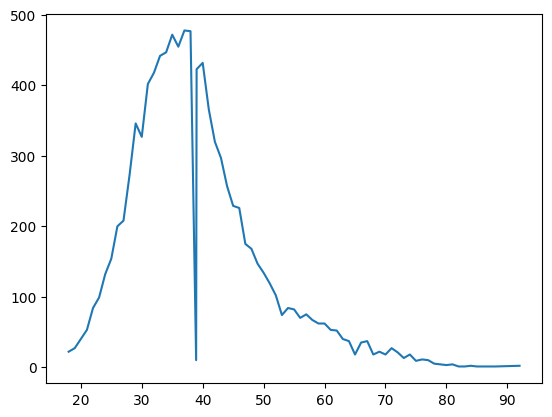

In [23]:
df["Age"].value_counts().sort_index(ascending = True).plot(kind = 'line')

In [24]:
df_4 = df.loc[df["Exited"] == 1]

In [25]:
df_4.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,38.924424,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44.000000,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,38.924424,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58.000000,1,132602.88,1,1,0,5097.67,1


<AxesSubplot:>

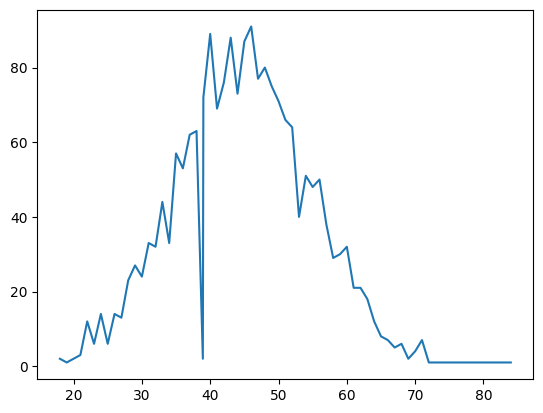

In [26]:
df_4["Age"].value_counts().sort_index(ascending = True).plot(kind = 'line')